In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import torch

In [2]:
from wdetector import get_watermarks_detection_model, predict_image, WatermarksPredictor

In [3]:
device = torch.device('cuda:0')

In [4]:
model = get_watermarks_detection_model(
    'resnext101_32x8d-large',
    device=device,
    cache_dir='weights/'
)

Downloading:   0%|          | 0.00/348M [00:00<?, ?B/s]

### Predict on single image

In [5]:
img = Image.open('images/watermark/3.jpg')
res = predict_image(img, model, device)

watermark


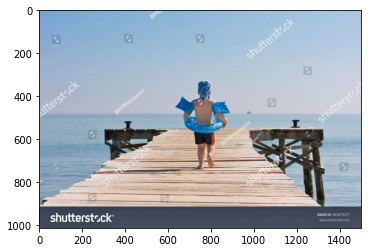

In [6]:
print('watermark' if res==1 else 'clear')
plt.imshow(np.array(img))
plt.show()

### Using predictor

In [7]:
paths = glob('images/*/*.jpg')

In [8]:
predictor = WatermarksPredictor(
    model, device, verbose=True
)

Using device cuda:0


In [9]:
help(predictor.run)

Help on method run in module wdetector.predictor:

run(files) method of wdetector.predictor.WatermarksPredictor instance
    Processes input objects (list of paths, list of PIL images, list of numpy arrays) and returns model results.
    files: objects to process. Should be list of paths to images or list of PIL images or list of numpy arrays



In [10]:
results = predictor.run(paths)

Files to process: 8


100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


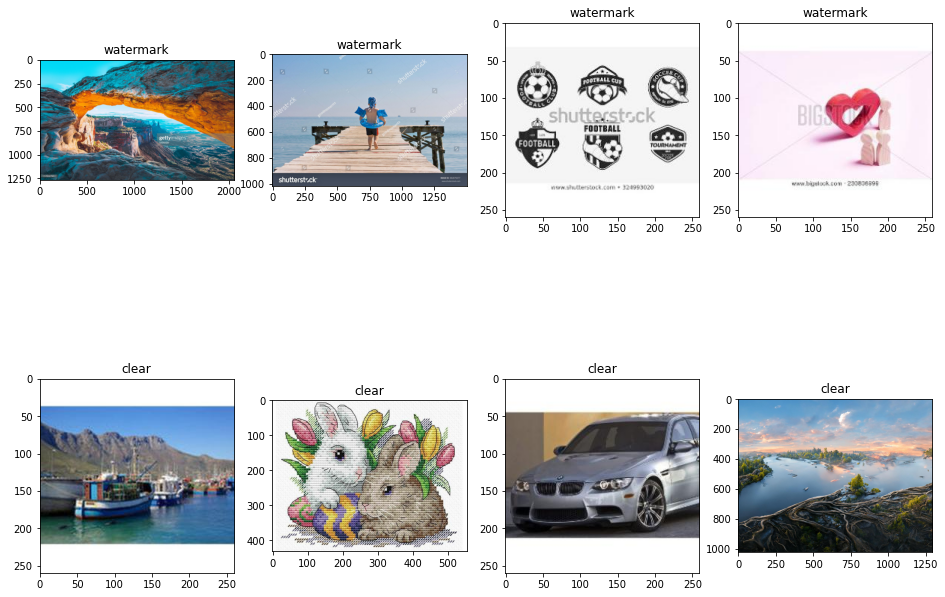

In [11]:
# show results
f, ax = plt.subplots(2,4, figsize=(16,12))
for i, (path, pred_label) in enumerate(zip(paths, results)):
    ax[i//4, i%4].imshow(plt.imread(path))
    ax[i//4, i%4].set_title('watermark' if pred_label == 1 else 'clear')